# Route Intersection INDEX Analysis

This code allows you to estimate the route intersection index, which is the ratio between the number of traffic signals and the total number of intersections along the route. All the node intersections related to each route are assumed to be previously estimated. These are found in the Shapes folder: Shapes/Routes_nodes

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv

print ("it works")

it works


### Example for only one route 

In [2]:
route = 1002
#dba = gpd.read_file('../Shapes/Rutas_arcs/R' +"%s" % (route) +'_phd_arcs_VF.shp')
dbn = gpd.read_file('../Shapes/Routes_nodes/R' +"%s" % (route) +'_phd_route_nodes.shp')
print (dbn.crs)
dbn.head()

{'init': 'epsg:3116'}


,highway,osmid,X_coor,Y_coor,Traf_light,Intersec,ruta,Heri,ID_node,Z,geometry
0,None,427730479,836440.310253,1.189387e+06,0,1,1002,0,4980.0,1480.108685,POINT (836440.3102531582 1189386.567983788)
1,None,2391339545,834330.528662,1.184288e+06,0,1,1002,0,15988.0,1488.943487,POINT (834330.5286615852 1184287.99010811)
2,None,4386168904,835205.014599,1.187217e+06,0,1,1002,0,25300.0,1487.808307,POINT (835205.0145991191 1187216.573041533)
3,None,3270979392,836153.559126,1.189291e+06,0,1,1002,1,15082.0,1476.096194,POINT (836153.5591262408 1189291.469705525)
4,None,428054215,836597.294500,1.189354e+06,0,1,1002,0,4997.0,1494.322776,POINT (836597.2945000001 1189354.042099225)


In [3]:
dbn.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
highway       11 non-null object
osmid         77 non-null object
X_coor        77 non-null float64
Y_coor        77 non-null float64
Traf_light    77 non-null int64
Intersec      77 non-null int64
ruta          77 non-null object
Heri          77 non-null int64
ID_node       77 non-null float64
Z             77 non-null float64
geometry      77 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 6.7+ KB


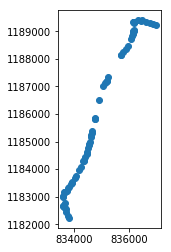

In [4]:
dbn.plot()

In [5]:
#route_long = ((dba['Long']).sum())
num_inters = ((dbn['Intersec']).sum())
num_tflights = ((dbn['Traf_light']).sum())
r_i_tflights = (num_tflights) / num_inters 
print(num_inters)
print(num_tflights)
print(r_i_tflights)

77
6
0.07792207792207792


In [6]:
results = pd.DataFrame ({
        "route": [str(route)],
        "num_inters": [num_inters],
        "num_tflights": [num_tflights],
        "r_i_tflights": [r_i_tflights]})
print(results)

  route  num_inters  num_tflights  r_i_tflights
0  1002          77             6      0.077922


### Route Intersection INDEX for ALL routes

The code requires the list of the routes. This list is located in the Tables folder. If you move this file out of this folder, please modify the code.   

In [7]:
routes = np.loadtxt('../Tables/Routes.txt',dtype='str')

In [9]:
for i in routes:
    dbn = gpd.read_file('../datos/shp/Rutas_nodes/R' +"%s" % (i) +'_phd_route_nodes.shp')
    num_inters = ((dbn['Intersec']).sum())
    num_tflights = ((dbn['Traf_light']).sum())
    r_i_tflights = (num_tflights) / num_inters  
    results = pd.DataFrame ({
        ""route": [str(route)],
        "num_inters": [num_inters],
        "num_tflights": [num_tflights],
        "r_i_tflights": [r_i_tflights]})
    results.to_csv('../Tables/OUT/R' +"%s" %(i)+'_nodes.txt',index=False, header=True)

This part of the code summarizes the route intersection index in only one table. Please copy it to a text file and save. 

In [10]:
print 'route,num_inters,num_tflights,r_i_tflights'
for i in routes:
    df=np.loadtxt('../datos/tables/OUT/Nodes/R' +"%s" %(i)+'_nodes.txt', delimiter=',',skiprows=1)
    print ((i),(df[1]),(df[2]),(df[3]))

ruta,r_dist,num_inters,num_tflights,I_Dens,I_tflights
('1002', 8900.8186368499992, 77.0, 6.0, 8.6508896699900006, 0.67409529895999998)
('1006', 3298.2333682200001, 49.0, 17.0, 14.8564381381, 5.1542744560799996)
('1009', 8830.8498289100007, 108.0, 39.0, 12.2298535353, 4.4163359988700002)
('1013', 3377.17793957, 33.0, 0.0, 9.7714720960800001, 0.0)
('10291', 2480.6002713600001, 27.0, 15.0, 10.8844622456, 6.0469234697700003)
('10292', 1739.3010795099999, 18.0, 4.0, 10.348984550200001, 2.2997743444799998)
('1050', 11113.3416836, 116.0, 25.0, 10.437904574799999, 2.2495483997300001)
('1052', 7158.7391479199996, 86.0, 24.0, 12.013288684400001, 3.3525456793599999)
('1079', 1789.4566049099999, 24.0, 4.0, 13.4118927132, 2.2353154522000001)
('1099', 13278.9614855, 125.0, 22.0, 9.4133867423400002, 1.6567560666500001)
('1100', 1734.0191054300001, 28.0, 3.0, 16.147457610099998, 1.73008474394)
('1101', 3737.8739183900002, 40.0, 8.0, 10.7012705279, 2.14025410558)
('1102', 4717.5670418600002, 66.0, 19.0